## Prediction using supervised Machine Learning (Level Beginner)
In this regression work, I will try to forecast a student's expected percentage of marks depending on the amount of hours they studied. Because there are only two variables, this is a straightforward linear regression problem.

** task info **
1. Predict a student's percentage based on the number of study hours.
2. Because there are just two variables, this is a straightforward Linear Regression problem.
3. R, Python, SAS Enterprise Miner, or any other tool are all options.
4. If a student studies for 9.25 hours per day, I will try to predict a score.

In [106]:
# All libraries required for this notebook are being imported.
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') # ignore warning

# Step-01: Data gathering

In [9]:
# Reading data from remote link
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
print('imported data successfully')
data

imported data successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.shape # Checking number of rows and columns

(25, 2)

In [12]:
data.info() # getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step-2: Data Cleaning

In [13]:
data.isnull().sum() # Checking null values

Hours     0
Scores    0
dtype: int64

There are no missing values

In [14]:
data.drop_duplicates(inplace=True) # drop duplicate values, if available
data.shape

(25, 2)

There is no duplicates value becaues number of row remain same

# Step-3: Statistical Analysis

In [15]:
data.describe().T # getting important statistical information

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# Step-4: Exploratory Data Analysis (EDA)

Let's eyeball our dataset by plotting our data points on a 2-D graph and seeing if we can spot any relationships between the data manually. Using the following script, we can make the plot:

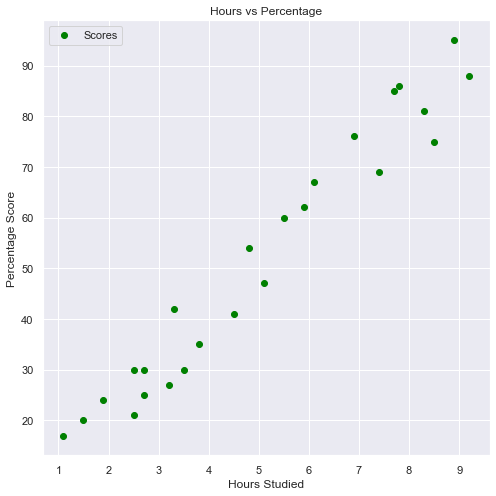

In [108]:
# Plotting the distribution of scores
plt.figure(figsize=(8,8))
sns.set(style='dark')
plt.scatter(x=data['Hours'], y=data['Scores'],label='Scores',color='green')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Hours vs Percentage')  
plt.legend()
plt.grid()
plt.show()

The graph above clearly shows that the number of hours studied and the percentage of score have a positive linear relationship.

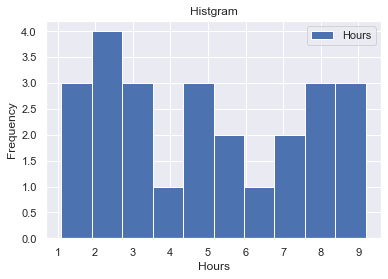

In [17]:
data['Hours'].plot(kind='hist') # Checking the distribution of Study Hours over x axis 
plt.xlabel('Hours')
plt.title('Histgram')  
plt.grid()
plt.legend()
plt.show()

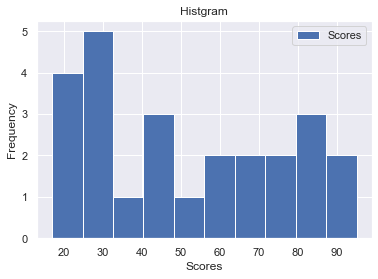

In [18]:
data['Scores'].plot(kind='hist') # Checking the distribution of Scores over x axis 
plt.xlabel('Scores')
plt.title('Histgram')  
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'boxenplot')

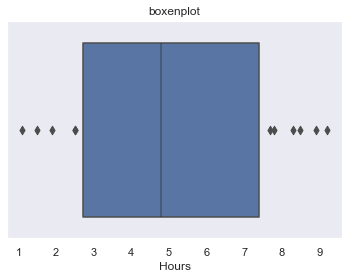

In [19]:
sns.boxenplot(data=data, x='Hours' ) # Checking unexpected values
plt.title('boxenplot')

Text(0.5, 1.0, 'boxenplot')

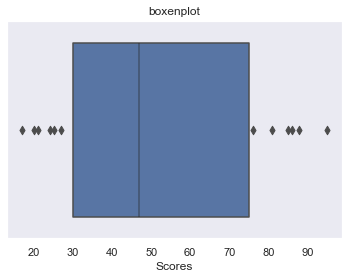

In [20]:
sns.boxenplot(data=data, x='Scores' ) # Checking unexpected values
plt.title('boxenplot')

# Step-5: Data Preprocessing
The data is then divided into "attributes" (inputs) and "labels" (outputs) (outputs)

In [21]:
feature=data[['Hours']] # Feature values 
feature

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [22]:
target=data[['Scores']] # target value
target

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


# Step-6: Train & Test split
The next step is to divide the data into training and test sets now that we have our attributes and labels. We'll use the built-in train_test_split() function in Scikit-Learn to achieve this:

In [23]:
from sklearn.model_selection import train_test_split

In [79]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(feature,target,test_size=0.2,random_state=2)

In [48]:
Xtrain.shape

(20, 1)

In [49]:
Xtest.shape

(5, 1)

# step-7: Training model
Now that I've separated our data into training and testing sets, it's time to train our algorithm.

In [80]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [81]:
regressor.fit(Xtrain,Ytrain)
print("Training complete.")

Training complete.


# Step-8: Plotting the regression line

Now, it's time to train our algorithm using feature and target.

In [82]:
Model=LinearRegression()
Model.fit(feature, target)

LinearRegression()

In [83]:
# Plotting the regression line
dummy_feature=np.linspace(1,10,25,endpoint=False).reshape(-1,1) # creating dummy_feature
dummy_feature
ypred=Model.predict(dummy_feature)  # predict dummy_feature
ypred

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.2594768 ],
       [15.77876602],
       [19.29805524],
       [22.81734446],
       [26.33663368],
       [29.8559229 ],
       [33.37521212],
       [36.89450134],
       [40.41379056],
       [43.93307978],
       [47.452369  ],
       [50.97165822],
       [54.49094744],
       [58.01023667],
       [61.52952589],
       [65.04881511],
       [68.56810433],
       [72.08739355],
       [75.60668277],
       [79.12597199],
       [82.64526121],
       [86.16455043],
       [89.68383965],
       [93.20312887],
       [96.72241809]])

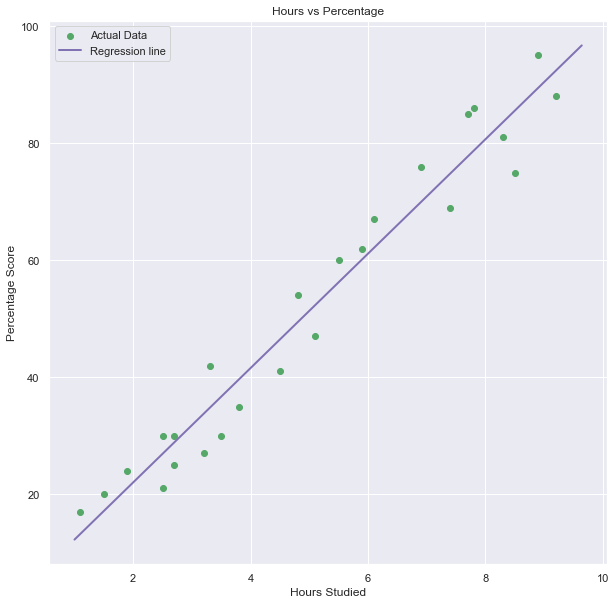

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(feature,target, label='Actual Data',color='g')
plt.plot(dummy_feature.ravel(), ypred.ravel(), label='Regression line',color='m',linewidth=2)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Hours vs Percentage')  
plt.legend()
plt.grid()
plt.show()

# Step-9: Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [112]:
Y_pred = regressor.predict(Xtest) # Predicting the scores
Pred=Y_pred.ravel() # converting 2D to 1D array
Pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [119]:
Actual=Ytest.values.ravel() # converting 2D to 1D array
Actual

array([17, 21, 24, 88, 76], dtype=int64)

In [120]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Actual, 'Predicted': Pred})  
df 

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [121]:
# testing our own data
hours = 9.25
OWN_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(OWN_pred[0]))

No of Hours = 9.25
Predicted Score = [93.45860056]


# Step-10: Evaluating the model

The algorithm's performance is evaluated as the last stage. This phase is especially crucial when comparing the performance of multiple algorithms on a certain dataset.. There are several measures that may be used in this way.

In [126]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, Y_pred)) 


Mean Absolute Error: 4.877039354964476
Mean Squared Error: 24.387620339856596


In [128]:
# Accuracy Testing
R_score=metrics.r2_score(Ytest, Y_pred)
print('Accuracy:',R_score*100 ) # R squared Error

Accuracy: 97.35538080811827
